In [44]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error,r2_score
import openpyxl
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
cc=pd.read_csv("C:\\Users\\C KIRANMAYI\\Downloads\\2020Yield\\Phase 1\\csv\\cloud_coverage.csv")

In [46]:
cc

,Year,Month,past,pasttopast,cloud_coverage
0,1990,1,0.68250,0.64875,0.68625
1,1990,2,0.70625,0.66000,0.68375
2,1990,3,0.68000,0.67000,0.66375
3,1990,4,0.69000,0.67250,0.67000
4,1990,5,0.68500,0.68250,0.68000
...,...,...,...,...,...
355,2019,8,0.63250,0.65750,0.65750
356,2019,9,0.66375,0.66375,0.65875
357,2019,10,0.65250,0.64375,0.67375
358,2019,11,0.65125,0.63875,0.64625


In [47]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            360 non-null    int64  
 1   Month           360 non-null    int64  
 2   past            360 non-null    float64
 3   pasttopast      360 non-null    float64
 4   cloud_coverage  360 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 14.2 KB


In [48]:
#Creating correlation for precipitation
#Creating the correlation matrix for the features
corr_matrix=cc.corr()
corr_matrix

,Year,Month,past,pasttopast,cloud_coverage
Year,1.000000e+00,2.844429e-15,-0.242236,-0.224245,-0.203356
Month,2.844429e-15,1.000000e+00,-0.391337,-0.366778,-0.389117
past,-2.422357e-01,-3.913372e-01,1.000000,0.626054,0.625374
pasttopast,-2.242454e-01,-3.667777e-01,0.626054,1.000000,0.578096
cloud_coverage,-2.033563e-01,-3.891170e-01,0.625374,0.578096,1.000000


In [49]:
mask = np.zeros_like(corr_matrix, dtype=np.bool_)
mask[np.triu_indices_from(mask)]= True

c:\Users\C KIRANMAYI\anaconda3\envs\myenv\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


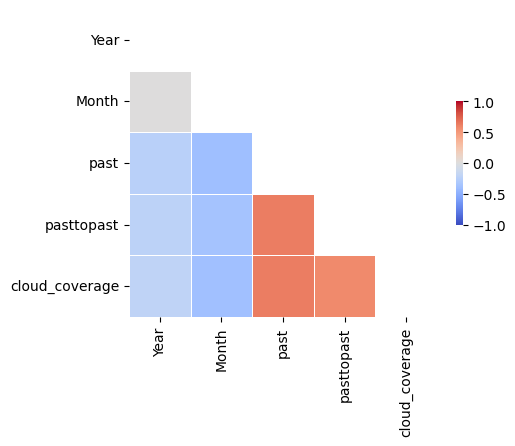

In [50]:
f, ax = plt.subplots(figsize=(5, 4)) 
heatmap = sns.heatmap(corr_matrix, mask = mask,square = True,linewidths = .5, cmap = 'coolwarm', cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},vmin = -1, vmax = 1,annot = True,annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [51]:
cc=cc.drop(['Year','Month'],axis=1)

In [52]:
cc.shape

(360, 3)

In [53]:
X=cc.drop('cloud_coverage',axis=1)
y=cc.cloud_coverage

In [54]:
X

,past,pasttopast
0,0.68250,0.64875
1,0.70625,0.66000
2,0.68000,0.67000
3,0.69000,0.67250
4,0.68500,0.68250
...,...,...
355,0.63250,0.65750
356,0.66375,0.66375
357,0.65250,0.64375
358,0.65125,0.63875


In [55]:
y

0      0.68625
1      0.68375
2      0.66375
3      0.67000
4      0.68000
        ...   
355    0.65750
356    0.65875
357    0.67375
358    0.64625
359    0.65875
Name: cloud_coverage, Length: 360, dtype: float64

In [56]:
X.shape

(360, 2)

In [57]:
y.shape

(360,)

In [58]:
# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshaping data for LSTM/GRU/RNN (samples, timesteps, features)
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], X_scaled.shape[1], 1))

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# GRU

In [59]:
def create_gru_model(units=64):
    model = Sequential()
    model.add(GRU(units=units, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mse')
    return model

In [60]:
gru_model = KerasRegressor(build_fn=create_gru_model, verbose=0)

C:\Users\C KIRANMAYI\AppData\Local\Temp\ipykernel_20980\2098133132.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  gru_model = KerasRegressor(build_fn=create_gru_model, verbose=0)


In [61]:
# Define the hyperparameter grid
gru_param_grid = {
    'units': [32, 64, 128],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

In [62]:
gru_grid = GridSearchCV(estimator=gru_model, param_grid=gru_param_grid, cv=3, scoring='neg_mean_squared_error')

In [63]:
gru_grid_result = gru_grid.fit(X_train, y_train)

KeyboardInterrupt: 

In [21]:
print(f"Best GRU params: {gru_grid_result.best_params_}")
print(f"Best GRU score: {gru_grid_result.best_score_}")

Best GRU params: {'batch_size': 32, 'epochs': 100, 'units': 128}
Best GRU score: -0.0001456505231761263


# LSTM

In [22]:
def create_lstm_model(units=64):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mse')
    return model

In [23]:
lstm_model = KerasRegressor(build_fn=create_lstm_model, verbose=0)

C:\Users\C KIRANMAYI\AppData\Local\Temp\ipykernel_20980\1916978622.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_model = KerasRegressor(build_fn=create_lstm_model, verbose=0)


In [24]:
# Define the hyperparameter grid
lstm_param_grid = {
    'units': [32, 64, 128],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

In [25]:
lstm_grid = GridSearchCV(estimator=lstm_model, param_grid=lstm_param_grid, cv=3, scoring='neg_mean_squared_error')

In [26]:
lstm_grid_result = lstm_grid.fit(X_train, y_train)

In [27]:
print(f"Best LSTM params: {lstm_grid_result.best_params_}")
print(f"Best LSTM score: {lstm_grid_result.best_score_}")

Best LSTM params: {'batch_size': 32, 'epochs': 100, 'units': 128}
Best LSTM score: -0.00014559198712981144


# RNN

In [28]:
def create_rnn_model(units=64):
    model = Sequential()
    model.add(SimpleRNN(units=units, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mse')
    return model

In [29]:
rnn_model = KerasRegressor(build_fn=create_rnn_model, verbose=0)

C:\Users\C KIRANMAYI\AppData\Local\Temp\ipykernel_20980\361697586.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  rnn_model = KerasRegressor(build_fn=create_rnn_model, verbose=0)


In [30]:
rnn_param_grid = {
    'units': [32, 64, 128],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

In [31]:
rnn_grid = GridSearchCV(estimator=rnn_model, param_grid=rnn_param_grid, cv=3, scoring='neg_mean_squared_error')

In [32]:
rnn_grid_result = rnn_grid.fit(X_train, y_train)

In [33]:
print(f"Best SimpleRNN params: {rnn_grid_result.best_params_}")
print(f"Best SimpleRNN score: {rnn_grid_result.best_score_}")

Best SimpleRNN params: {'batch_size': 32, 'epochs': 50, 'units': 128}
Best SimpleRNN score: -0.0001531501651659371


In [34]:
# Evaluating GRU model on test data
best_gru_model = gru_grid_result.best_estimator_
y_pred_gru = best_gru_model.predict(X_test)
mse_gru = mean_squared_error(y_test, y_pred_gru)


print(f"GRU Model - MSE: {mse_gru}")

# Evaluating LSTM model on test data
best_lstm_model = lstm_grid_result.best_estimator_
y_pred_lstm = best_lstm_model.predict(X_test)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)


print(f"LSTM Model - MSE: {mse_lstm}")

# Evaluating SimpleRNN model on test data
best_rnn_model = rnn_grid_result.best_estimator_
y_pred_rnn = best_rnn_model.predict(X_test)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)


print(f"SimpleRNN Model - MSE: {mse_rnn}")


GRU Model - MSE: 0.00014605879485233547
LSTM Model - MSE: 0.00014480383484895455
SimpleRNN Model - MSE: 0.0001452552249753022


## LSTM is sutaible for Cloud Coverage with least MSE

In [35]:
cc2021=pd.read_csv("C:\\Users\\C KIRANMAYI\\Downloads\\2020Yield\\Phase 1\\csv\\2020\\cloud_coverage.csv")

In [36]:
cc2021 = cc2021.drop(['Year','Month'],axis=1)

In [37]:
cc2021

,past,pasttopast
0,0.66625,0.64750
1,0.67125,0.69000
2,0.69125,0.66625
3,0.68875,0.67250
4,0.63750,0.65500
5,0.66000,0.65625
6,0.66250,0.63750
7,0.65750,0.63250
8,0.65875,0.66375
9,0.67375,0.65250


In [38]:
cc2020_pred=[]

In [39]:
cc2021_scaled = scaler.transform(cc2021)

# Reshape for prediction
cc2021_scaled = np.reshape(cc2021_scaled, (cc2021_scaled.shape[0], cc2021_scaled.shape[1], 1))

In [40]:
best_model = lstm_grid_result.best_estimator_

cc2020_pred=best_model.predict(cc2021_scaled)

In [41]:
cc2020_pred

array([0.65878016, 0.67455506, 0.6747021 , 0.6757501 , 0.6489917 ,
       0.6590925 , 0.653893  , 0.65010107, 0.66104215, 0.66346735,
       0.65158063, 0.64808846], dtype=float32)

In [42]:
cloud_data=pd.DataFrame(data=cc2020_pred)
cloud_data

,0
0,0.658780
1,0.674555
2,0.674702
3,0.675750
4,0.648992
5,0.659092
6,0.653893
7,0.650101
8,0.661042
9,0.663467


In [43]:
cloud_data.to_csv("C:\\Users\\C KIRANMAYI\\Downloads\\2020Yield\\Phase 1\\csv\\2020\\cloud_coverage1.csv")